# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2022/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday November 1st, 2022 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/ (we won't be doing peergrading, but we'll still use http://peergrade.io/ for the handin.)

# Data

This assignment will be based on the DC and Marvel superhero dataset you downloaded during the Week 4 exercises. It's important that you work with your own dataset.

You will need the network structure and the page texts to complete the assignment.

To show that you have collected these files, please place your files somewhere that's accessible online (e.g. a github repo or a webpage) and link to your files from your notebook. (We will appreciate it if you store the wiki pages in plain text and the network as an edgelist. )

In [1]:
import networkx as nx
import pickle
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from scipy import stats
from fa2 import ForceAtlas2
import powerlaw
import pandas as pd
import nltk
import numpy as np
import random
from wordcloud import WordCloud

with open('graph.pickle', 'rb') as handle:
    G = pickle.load(handle)

# Basic Stats

Write a short paragraph describing the network. The paragraph should contain the following information

* The number of nodes and links. 

The network is constructed using Wikipedia pages of characters from the Marvel and DC universe, where each node represents the character.  The network is a directed graph: if the Wikipedia page of character A links to the Wikipedia page of character B, an outgoing edge is established from node A to B. 

Each node has two attributes: "universe" and "content length". The "universe" attribute describes which universe the character is from, either Marvel or DC. The "content length" attribute describes how many words there are in each character's Wikipedia page. In total, there are 2091 nodes and 26739 links, as seen below.


In [2]:
nodes = len(G.nodes())
edges = len(G.edges())
print("The network has {} nodes and {} links.".format(nodes, edges))

The network has 2091 nodes and 26739 links.


* The average, median, mode, minimum and maximum value of the network's in-degree.s And of the out-degrees.


Below, we have some summary statistics for the in-degree and out-degree of the network

In [3]:
in_degs = [G.in_degree(node) for node in G.nodes()]
out_degs = [G.out_degree(node) for node in G.nodes()]

# In-degree
print("The average of the in-degrees is:", np.mean(in_degs))
print("The median of the in-degrees is:", np.median(in_degs))
print("The mode of the in-degrees is:", stats.mode(in_degs).mode[0]) # rimelig sikker på det her er rigtigt
print("The minimum of the in-degree is:", np.min(in_degs))
print("The maximum of the in-degree is:", np.max(in_degs))
print("\n")

# Out-degree
print("The average of the out-degrees is:", np.mean(out_degs))
print("The median of the out-degrees is:", np.median(out_degs))
print("The mode of the out-degrees is:", stats.mode(out_degs).mode[0])
print("The minimum of the out-degree is:", np.min(out_degs))
print("The maximum of the out-degree is:", np.max(out_degs))



The average of the in-degrees is: 12.787661406025824
The median of the in-degrees is: 5.0
The mode of the in-degrees is: 1
The minimum of the in-degree is: 0
The maximum of the in-degree is: 434


The average of the out-degrees is: 12.787661406025824
The median of the out-degrees is: 9.0
The mode of the out-degrees is: 0
The minimum of the out-degree is: 0
The maximum of the out-degree is: 109



We also want the degree distributions and a plot of the network

(Friendly hint: Remember figure captions.)

* Create and visualize in- and out-going degree distributions as described in Lecture 4. Think about which axes you should use - loglog is great for power-law distributions, but not necessarily for Poisson-like degree distributions.* Create in- and out-going degree distributions as described in Lecture 5.

In [4]:
in_degs = [i[1] for i in G.in_degree()]

min_ = min(in_degs)
max_ = max(in_degs)

height, bins = np.histogram(in_degs, bins=np.arange(min_,max_+2) - 1/2)

binmids = []
for i in range(len(bins)-1):
    binmids.append((bins[i]+bins[i+1])/2)

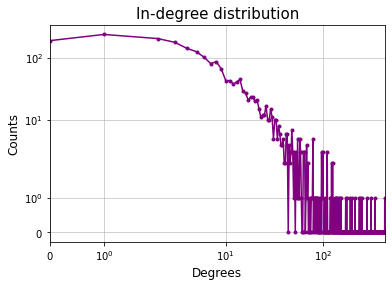

In [5]:
plt.title('In-degree distribution', size=15)
plt.xlabel('Degrees', size=12)
plt.ylabel('Counts', size=12)
plt.plot(binmids, height, '-o', color='purple', markersize=3)
plt.grid(alpha=0.7)
plt.rc('axes', axisbelow=True)
plt.xscale("symlog")
plt.yscale("symlog")
plt.xlim(0, max_+1);

In [6]:
out_degs = [i[1] for i in G.out_degree()]

min_ = min(out_degs)
max_ = max(out_degs)
        
height, bins = np.histogram(out_degs, bins=np.arange(min_,max_+2) - 1/2)

binmids = []
for i in range(len(bins)-1):
    binmids.append((bins[i]+bins[i+1])/2)

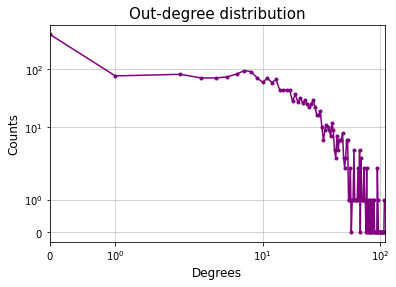

In [7]:
plt.title('Out-degree distribution', size=15)
plt.xlabel('Degrees', size=12)
plt.ylabel('Counts', size=12)
plt.plot(binmids, height, '-o', color='purple', markersize=3)
plt.grid(alpha=0.7)
plt.rc('axes', axisbelow=True)
plt.xscale("symlog")
plt.yscale("symlog")
plt.xlim(0, max_+1);

* Estimate, report, and reflect on the slope and starting value of the incoming degree distribtion's power law using the tools described in Lecture 5 - and display the fit on top of your incoming degree-distribution plot.

We use the ``np.polyfit`` function to estimate the slope and initial value.

In [8]:
in_degs = [i[1] for i in G.in_degree()]

min_ = min(in_degs)
max_ = max(in_degs)

height, bins = np.histogram(in_degs, bins=np.arange(min_,max_+2) - 1/2)

binmids = []
for i in range(len(bins)-1):
    binmids.append((bins[i]+bins[i+1])/2)

In [9]:
a, b = np.polyfit(np.log(binmids[1:44]), np.log(height[1:44]), deg=1)
xs = np.linspace(1,450)
print('Linear Fit: {}*x + {}'.format(round(a,3),round(b,3)))

Linear Fit: -1.328*x + 6.725


Checking with the ``powerlaw`` package, we see that we get around the same slope.

In [10]:
fit = powerlaw.Fit(in_degs,xmin=1,discrete=True)
fit.alpha

Values less than or equal to 0 in data. Throwing out 0 or negative values


1.3922096106303259

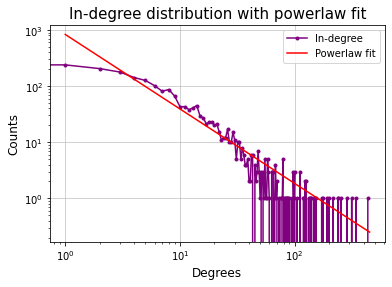

In [11]:
plt.title('In-degree distribution with powerlaw fit', size=15)
plt.xlabel('Degrees', size=12)
plt.ylabel('Counts', size=12)
plt.plot(binmids, height, '-o', color='purple', markersize=3, label='In-degree')
plt.grid(alpha=0.7)
plt.rc('axes', axisbelow=True)
plt.xscale("symlog")
plt.yscale("symlog")
plt.loglog(xs,np.exp(1)**b*xs**(a),color='red', label='Powerlaw fit');
plt.legend();

The authors of the paper found that the slope of the out-degrees are slightly higher than the slope of the in-degrees. And according to them, the out-degree distribution is often not a clear power law. This is also what we see in the degree distribution plots above.

* Plot the network using the Force Atlas algorithm as described in Lecture 5.

We will now plot the network using the Force Atlas algorithm. First, we find the greatest connected component. 

In [12]:
# make G undirected
G_undirected = G.to_undirected()

# get node attribute "universe" of the undirected graph
node_attr = nx.get_node_attributes(G_undirected, "universe")

largest_cc = G.subgraph(max(nx.connected_components(G_undirected), key=len)).copy()
print("Number of nodes in the largest connected component:", len(largest_cc.nodes()))

Number of nodes in the largest connected component: 2087


Thereafter, we compute the parameters necessary for plotting the network with the Force Atlas algorithm. The node size of each node depends on the degree of the node. The colour of each node depends on whether it belongs to the Marvel or DC universe. Finally, there are three different edge colours: one for links between two Marvel characters, one for links between two DC characters and one for linking two nodes from different universes.

In [13]:
# compute node size 
node_size = [G_undirected.degree()[i] for i in G_undirected.nodes()]

# create colormap of each node
color_map = ["#C41E3A" if node_attr[n] == 'marvel' else "#000000" for n in G_undirected.nodes()]

# create colormap for edges
color_a = '#00FFFF' # cyan
color_b = '#FFC300' # yellow
color_c = '#BF40BF' # magenta

marvel_nodes = [node for node in G.nodes() if node_attr[node] == 'marvel']
dc_nodes = [node for node in G.nodes() if node_attr[node] == 'dc']
color_map_marvel = ["#C41E3A" for n in marvel_nodes]
color_map_dc = ["#000000" for n in dc_nodes]

edge_color = []

for edge in G_undirected.edges():
    from_, to_ = edge
    if node_attr[from_] == 'marvel' and node_attr[to_] == 'marvel':
        edge_color.append(color_a)
    elif node_attr[from_] == 'dc' and node_attr[to_] == 'dc':
        edge_color.append(color_b)
    else:
        edge_color.append(color_c)
        

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:02<00:00, 16.30it/s]


BarnesHut Approximation  took  16.31  seconds
Repulsion forces  took  102.57  seconds
Gravitational forces  took  0.38  seconds
Attraction forces  took  0.66  seconds
AdjustSpeedAndApplyForces step  took  1.26  seconds


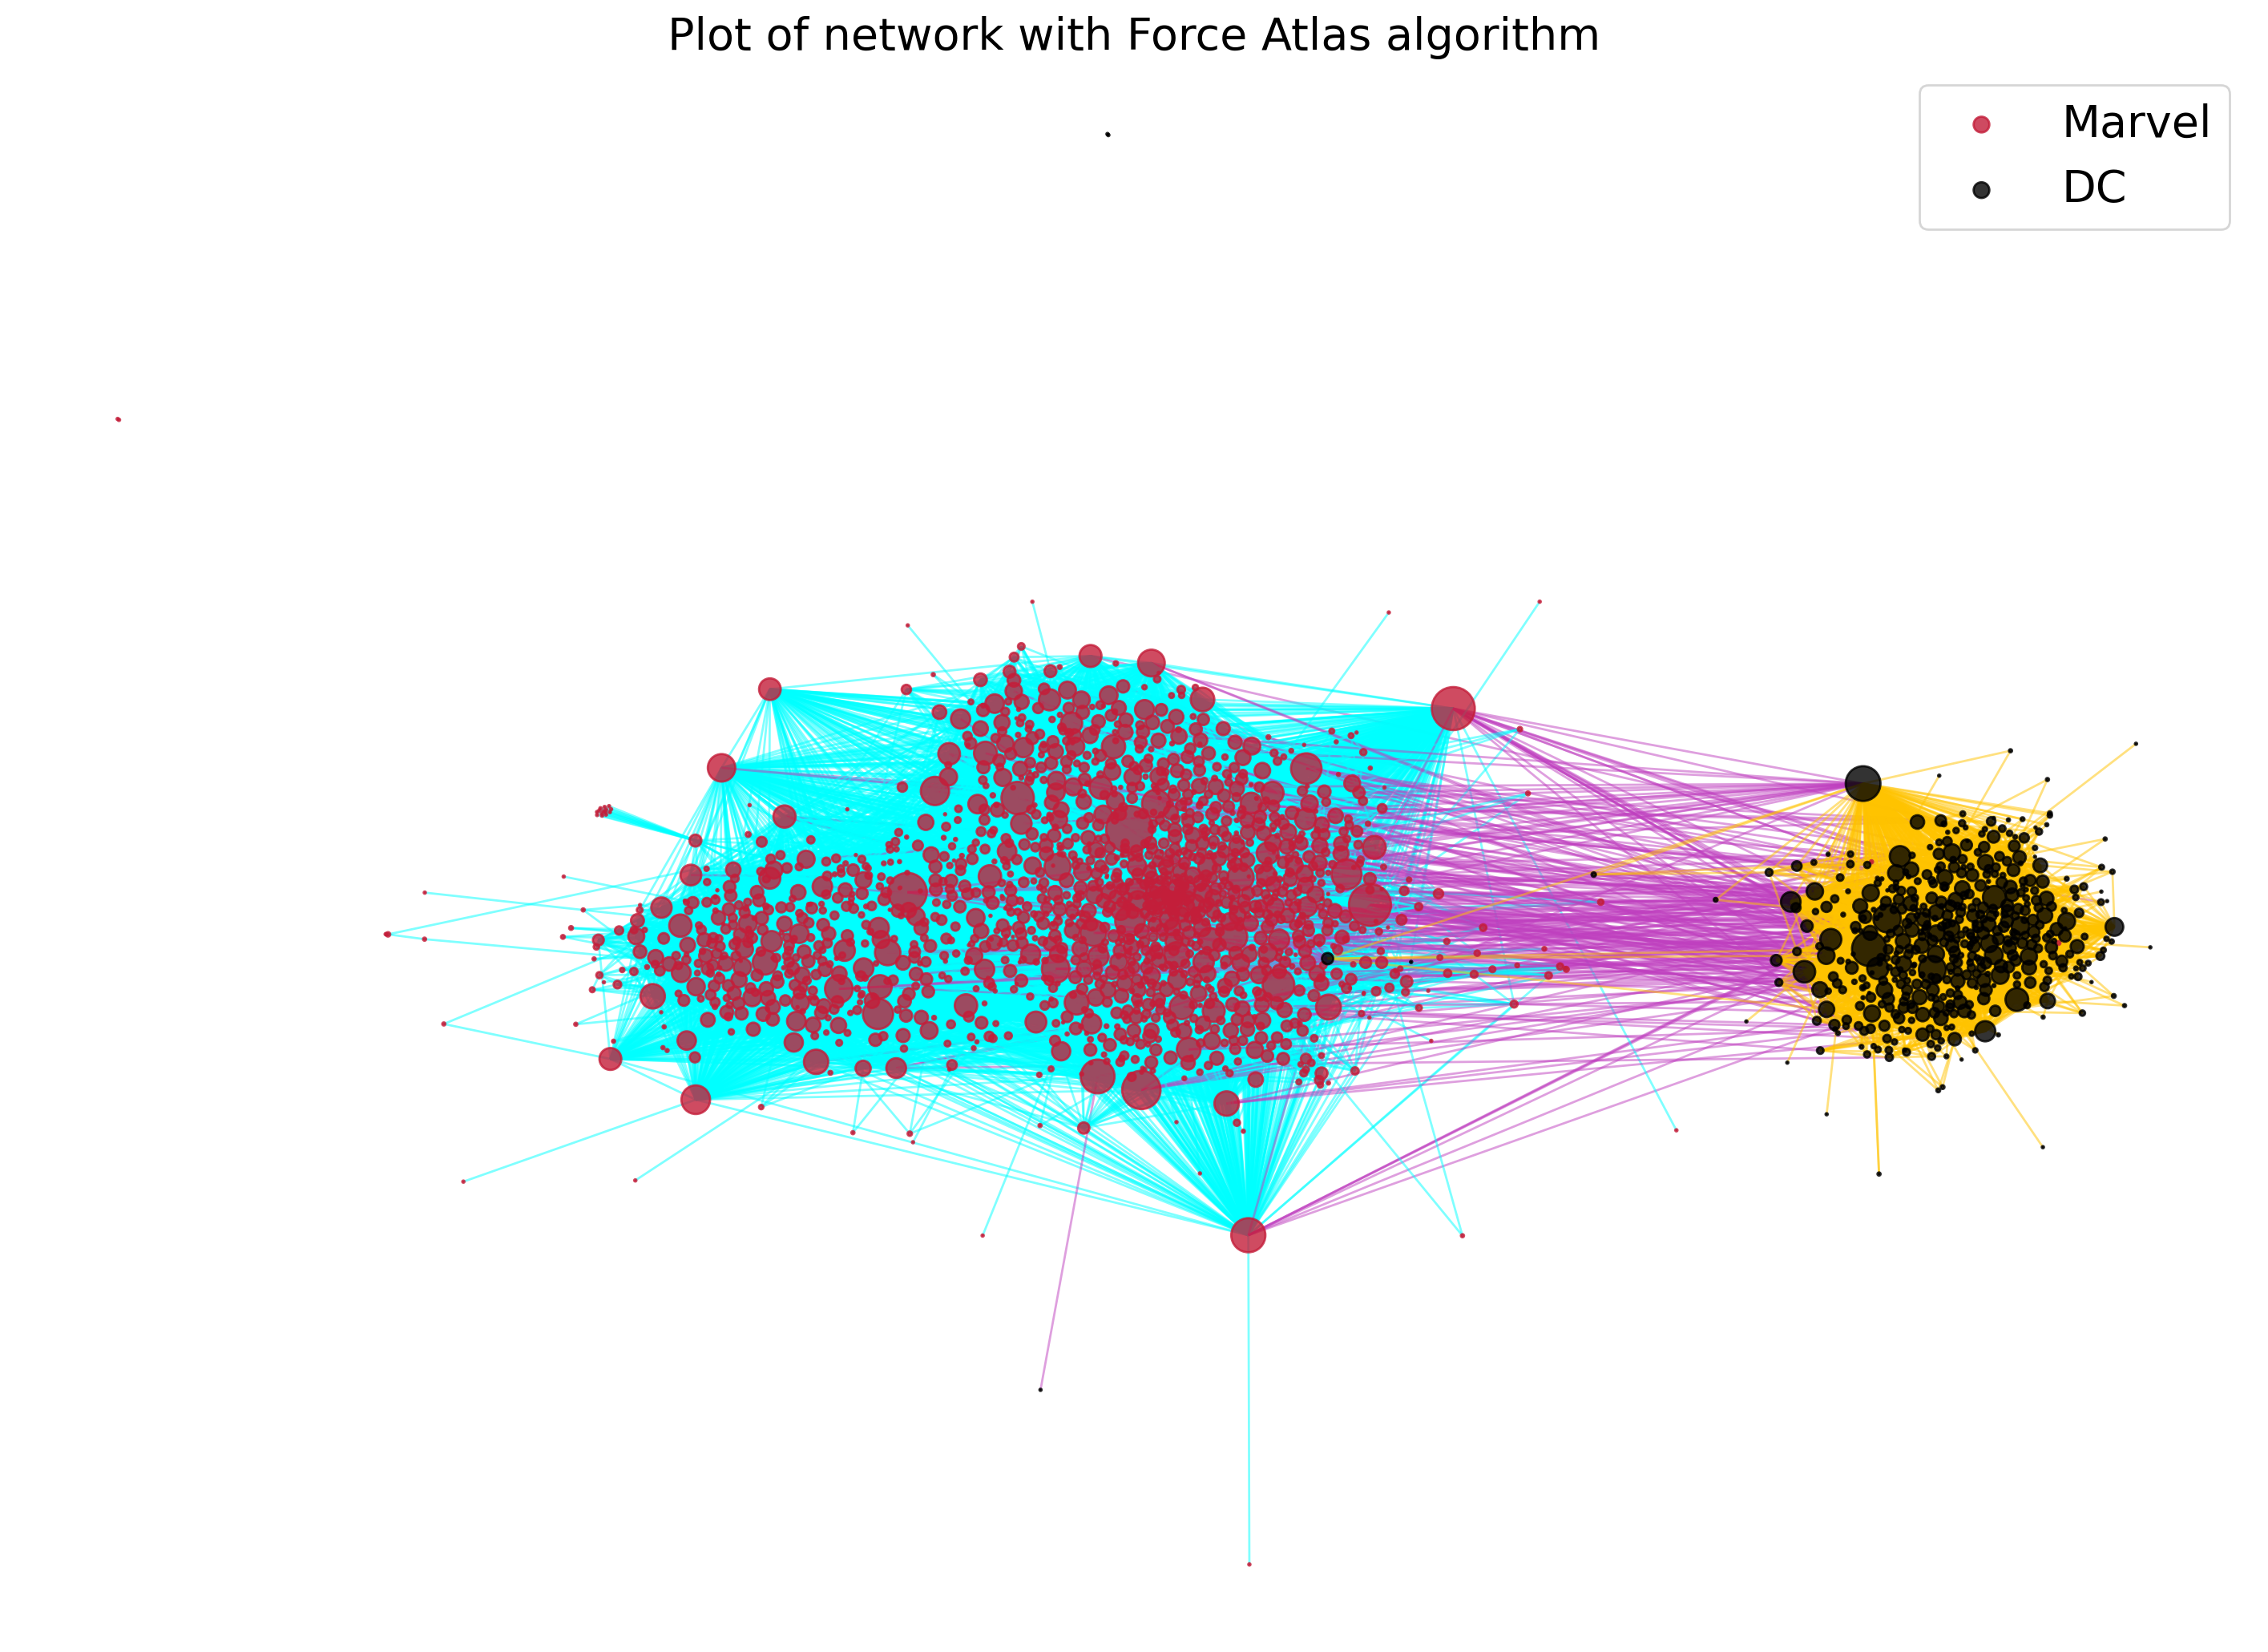

In [18]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.1,
                        strongGravityMode=False,
                        gravity=10.0,

                        # Log
                        verbose=True)

fig = plt.figure(figsize=(18,13), dpi=200)
plt.title("Plot of network with Force Atlas algorithm", fontsize=20)
positions = forceatlas2.forceatlas2_networkx_layout(G_undirected, pos=None, iterations=2000)
nx.draw_networkx_nodes(G_undirected, positions, node_size=node_size[:len(marvel_nodes)], nodelist=marvel_nodes, node_color=color_map_marvel, alpha=0.8, label='Marvel')
nx.draw_networkx_nodes(G_undirected, positions, node_size=node_size[len(marvel_nodes):], nodelist=dc_nodes, node_color=color_map_dc, alpha=0.8, label='DC')
nx.draw_networkx_edges(G_undirected, positions, edge_color=edge_color, alpha=0.5)
plt.axis('off')
lgnd = plt.legend(prop={'size': 20})
for handle in lgnd.legendHandles:
    handle.set_sizes([50.0])
plt.show()

# Communities

Find and visualize the communities in one or both of the superhero universes (DC/Marvel) as described in Week 7.

Write a paragraph about your work to identify the communities. The paragraph should include

* Information about the algorithm you used to find communities.
* The value of modularity for your network.
* The number of communities and their sizes (in terms of number of nodes).

First we partition the dataset into two communities: One for all the Marvel characters and one for that DC characters.
The modularity is then calculated for this partition:

In [ ]:
def computeModularity(G, partition):
    #Here the partition input is an attribute that we will partition the data set by
    partitions = np.unique(list(nx.get_node_attributes(G,partition).values()))
    partition_dic = {part: [] for part in partitions}
    
    N = len(G.nodes())
    L = len(G.edges())
    
    modularity = 0
    #sort nodes into their respective communities
    for key in partition_dic.keys():
        for node in G.nodes():
            part = G.nodes[node][partition]
            partition_dic[part].append(node)
        community = nx.Graph.subgraph(G, partition_dic[key])
        k_c = sum([G.degree(v) for v in community])
        L_c = len(community.edges())

        #compuute modularity
        modularity += (L_c / L) - (k_c/(2*L))**2
        
    return modularity
computeModularity(G_undirected,'universe')

The universes are a decent partitioning, as the modularity is 0.286. We would expect characters to interact more with characters from the same universe, so it makes sense that creating communities from this attribute would yield good results.

We now create communities within the marvel universe using the Louvain algorithm:

In [ ]:
import community
#find marvel nodes
marvel_nodes = (
    node
    for node, data
    in G_undirected.nodes(data=True)
    if data.get("universe") == "marvel"
)
# nx.get_node_attributes(G,'universe')
m_G = G_undirected.subgraph(marvel_nodes)
partition = community.best_partition(m_G)


In [ ]:
with open('graph.pickle', 'rb') as handle:
    partition = pickle.load(handle)

In [ ]:
def computeModularity(G, partition):
    #Here we use the partition calculated by community as the partition input instead. The function has been modified accordingly
    partitions = np.unique(list(partition.values()))
    partition_dic = {part: [] for part in partitions}
    N = len(G.nodes())
    L = len(G.edges())
    
    modularity = 0
    for key in partition_dic:#_dic.keys():
        for node in G.nodes():
            part = partition[node]
            partition_dic[part].append(node)
        community = nx.Graph.subgraph(G, partition_dic[key])
        k_c = sum([G.degree(v) for v in community])
        L_c = len(community.edges())


        modularity += (L_c / L) - (k_c/(2*L))**2
        
    return modularity
modularity = computeModularity(m_G,partition)
modularity

The modularity of this partition is higher than for the communities based on character's universe. This is to be expected as the Louvain algorithm optimises for modularity.

In [ ]:
print("Number of partitionings:", len(np.unique(list(partition.values()))))


#Count number of nodes in each partitioning:
partitions = np.unique(list(partition.values()))
partition_dic = {part: [] for part in partitions}
for part in partition_dic.keys():
    count = 0
    for key in partition:
        if partition[key] == part:
            count += 1
    partition_dic[part]=count
print("Partitioning sizes:",partition_dic)

Taking a closer look at the Louvain-partition there are 16 communities, with the largest consisting of 350 nodes, and the smallest containing only a single node.

In [ ]:
#find top 10 largest communities
top_10  =[x[0] for x in sorted(partition_dic.items(), key=lambda x: x[1], reverse=True)][:10]
top_10

The largest community is community 4, and the rest of the 10 largest communities are presented from left to right.

Initially we observed how well the universe parameter works as a partition. We can measure how good the communities that are based on this attribute by calculating the modularity. This partition got a modularity score of 0.286 which is good, which is as expected, since the plot of the network cleary shows the two universes as being more intraconnected than interconnected.

Within each universe there are also communities of related characters. In order to find the best partition for these communities we use the python louvain algorithm. The Louvain algorithm optimimses modularity, and thus, the resulting partition will have the highest possible modularity that can be reached from a given initialisation. We chose to look at communities in the Marvel network, meaning the nodes representing marvel characters.

The resulting partition had 16 communities of varying sizes. The largest community, community 4, contained 350 nodes, while the smallest, community 5 and 7, had only a single node. In order from largest to smallest the comminites are:

| Community | 0   | 1   | 2   | 3  | 4   | 5 | 6  | 7 | 8  | 9   | 10 | 11 | 12 | 13 | 14 | 15 |
|-----------|-----|-----|-----|----|-----|---|----|---|----|-----|----|----|----|----|----|----|
| Size      | 218 | 311 | 302 | 31 | 350 | 1 | 20 | 1 | 25 | 298 | 28 | 4  | 11 | 11 | 2  | 4  |



This partition had a modularity of 0.392. This should be the maximum modularity possible for a partition of the marvel nodes and notably it beats the "universe" partition's modularity score of 0.286. Considering the universe partition was already good, it indicates that the Louvain algorithm perfomed well.


> For the 10 largest communities, process the text in order to create a TF-IDF vector for each community. Explain in your own words how TF-IDF works.

In [ ]:
import pandas as pd
#load dataframe:
df = pd.read_pickle("df.pickle")


In [ ]:
from nltk.corpus import stopwords
from tqdm import tqdm
community_dic = {part: [] for part in partition_dic.keys()}
for part in tqdm(partition_dic.keys()):#for each community 
    community_doc = str()
    for node in [key for (key,value) in partition.items() if value==part]:#for each character in that community
        tokens = list(df.loc[df["WikiLink"]==node]['WikiText'])#Extract clean text from data frame
        
        
        if len(tokens)!=0:#handle nodes with no text
            community_doc +=' '+ tokens[0]#add extra space to ensure we can split into tokens later
        else:
            break
    #tokenize:
    community_dic[part]=community_doc

In [ ]:
#calculate TF

from nltk.tokenize import word_tokenize
alphabet = 'abcdefghijklmnopqrstuvwxyz'

token_dic = {}
for part in tqdm(community_dic.keys()):#for each community
    tokens = word_tokenize(community_dic[part])#divide text into tokens
    text = community_dic[part]
    token_list = []
    for token in tokens:
        if token not in TF_dic.keys() and len(token)!=0:
            token = token.lower()
            
            if token[0] in alphabet and token[-1] in alphabet:#remove punctuation and signs
                token_list.append(token)
    token_dic[part]=token_list

In [ ]:
TF_outer_dic =  {} 
for part in tqdm(top_10):
    TF_dic = {}
    for token in token_dic[part]:
        if token not in TF_dic.keys():
            TF_dic[token]=token_dic[part].count(token)#count frequency
    TF_outer_dic[part]=TF_dic

In [ ]:
N = 10
IDF_outer_dic = {}
for part in top_10:#for each community
    IDF_dic = {}
    for word in tqdm(TF_outer_dic[part].keys()):#for each word in that community
        
        count = 0
        for part2 in top_10:
            if word in token_dic[part2]:
                count += 1 #count occurences in all documents
        IDF_dic[word]=np.log(N/count)#uses natural log
    IDF_outer_dic[part]=IDF_dic

In [ ]:
TF_IDF_outer_dic = {}
for part in tqdm(top_10):
    TF_IDF_dic = {}
    for word in IDF_outer_dic[part].keys():
        TF_IDF_dic[word]=TF_outer_dic[part][word]*IDF_outer_dic[part][word]
    TF_IDF_outer_dic[part]=TF_IDF_dic
massive_dic = {'TF':TF_outer_dic,'IDF':IDF_outer_dic,'TF_IDF':TF_IDF_outer_dic}

In [14]:
# load stuff
with open('TF_IDF_dict.pickle', 'rb') as handle:
    tf_idf = pickle.load(handle)

with open('partition.pickle', 'rb') as handle:
    partition = pickle.load(handle)
    
for key in tf_idf.keys():
    s = tf_idf[key]
    top10 = sorted(s.items(), key=lambda x: x[1], reverse=True)[:10]
    print(top10)
    print("\n")

[('mystique', 684.829414393226), ('uncanny', 657.7085966230226), ('betsy', 628.4738038581387), ('rogue', 561.9081861425898), ('emma', 494.990029429245), ('sinister', 476.6003069736693), ('frost', 462.2971895082216), ('cyclops', 446.557029811293), ('mojo', 415.23498140799785), ('phoenix', 406.1063708939626)]


[('aries', 74.03414397196862), ('anaconda', 69.63809562243578), ('creel', 62.60658582494868), ('batroc', 58.224363167035406), ('thunderstrike', 54.9774439124493), ('masterson', 47.64711805745607), ('zemo', 47.08109259991267), ('asp', 37.56792000684036), ('mamba', 36.04365338911715), ('strongbow', 34.53877639491069)]


[('spider-man', 309.0223924244047), ('cat', 294.58755173797675), ('octavius', 205.24912393981074), ('carnage', 192.6949161956648), ('daredevil', 191.53444489509928), ('octopus', 176.2348401992668), ('felicia', 170.60041871801462), ('flash', 161.50329307046727), ('punisher', 149.09012656639013), ('venom', 138.4337440405835)]


[('conan', 304.60511949446186), ('athena'

In [15]:
# adapted from: https://stackoverflow.com/a/43043723

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * float(np.random.randint(30, 200)) / 255.0)
    s = int(100.0 * float(np.random.randint(30, 200)) / 255.0)
    l = int(100.0 * float(np.random.randint(30, 200)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

random_color_func()

'hsl(200, 32%, 17%)'

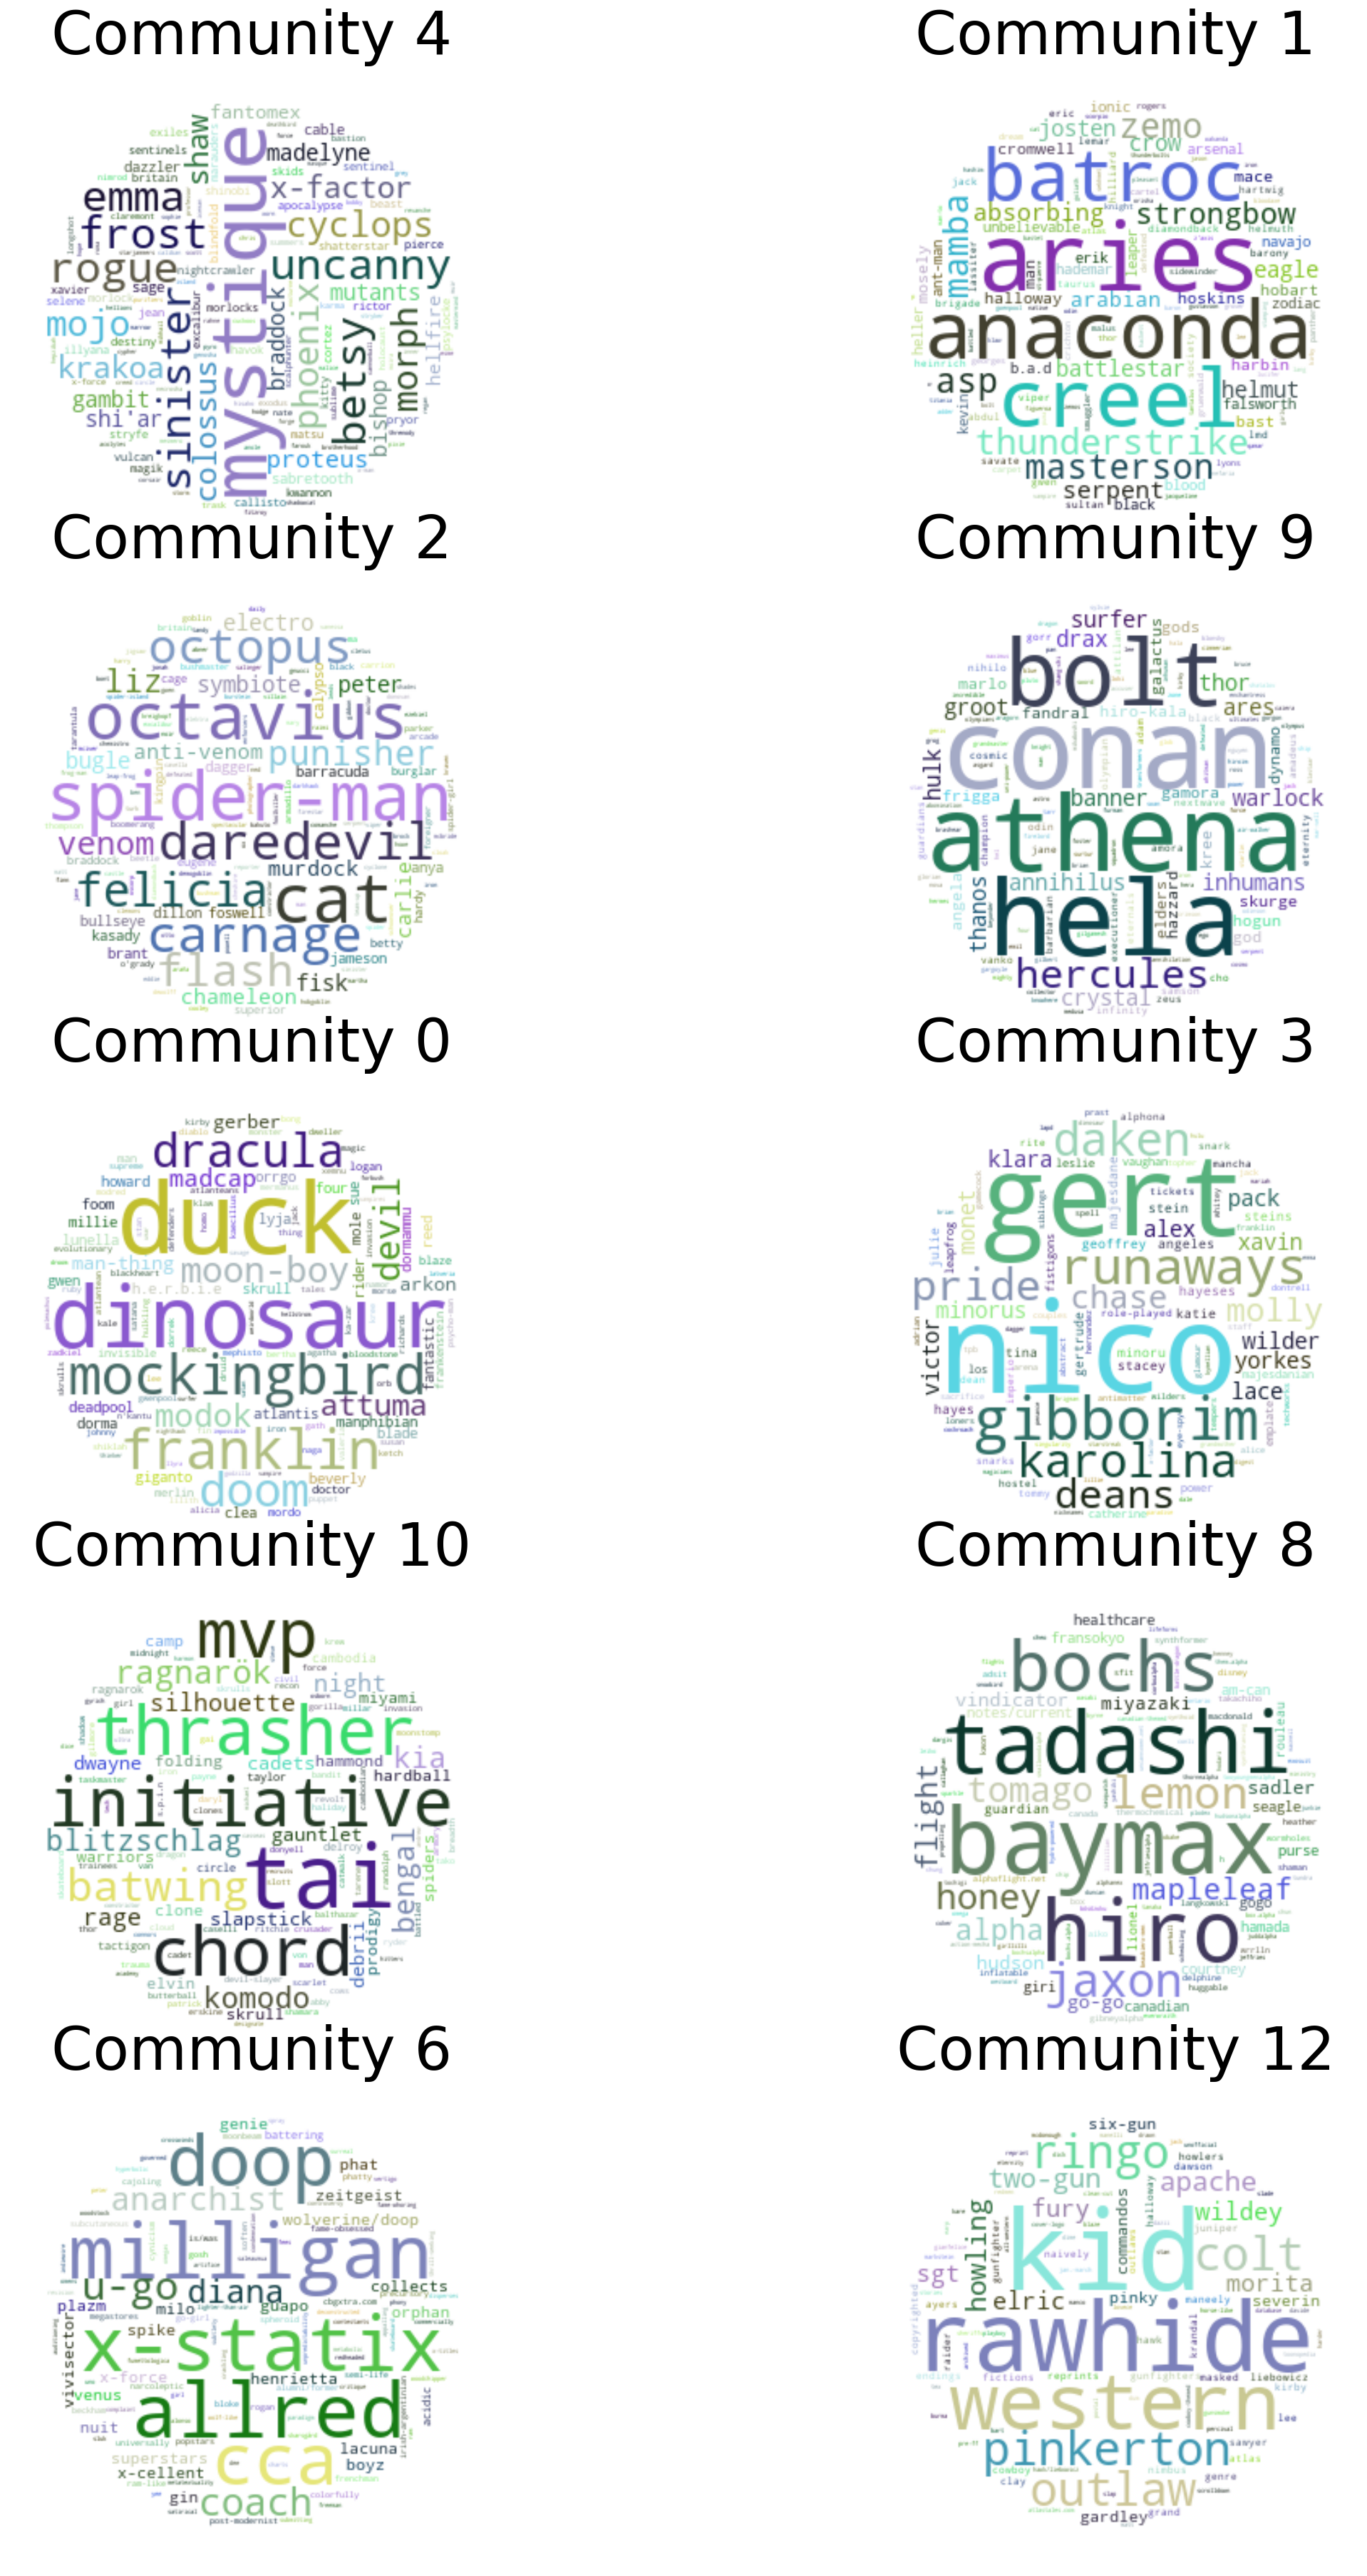

In [16]:
# taken from: https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

fig = plt.figure(figsize=(20,30),dpi=120,constrained_layout=True)
i=1

for key in tf_idf.keys():
    TF_IDF = tf_idf[key]
    
    wc = WordCloud(background_color="white", repeat=True, mask=mask, color_func=random_color_func)
    # make wordcloud from TF-IDF
    wordcloud = wc.generate_from_frequencies(TF_IDF)
    
    ax = fig.add_subplot(5,2,i)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title("Community {}".format(key), size=50)
    ax.axis("off")
    i+=1
    
plt.show()

# Sentiment

First calculate the sentiment for all character pages. Calculate the mean value of the sentiment and the 10th and 90th percentile values for the sentiment. Then create a nice histogram displaying the distribution of sentiment values for all pages. Indicate the mean, etc on that histogram.

First, we load the LabMT wordlist dataset as a dataframe. Then using the function ``text2sentiment_freqdist``, we calculate the sentiment for all character pages.

In [17]:
# load pandas dataframe
df_happy = pd.read_csv('Data_Set_S1.txt', skiprows=2, sep="\t")

# load character dataframe
with open('df.pickle', 'rb') as handle:
    df = pickle.load(handle)

df_happy

word  happiness_rank  happiness_average  \
0       laughter               1               8.50   
1      happiness               2               8.44   
2           love               3               8.42   
3          happy               4               8.30   
4        laughed               5               8.26   
...          ...             ...                ...   
10217     murder           10218               1.48   
10218  terrorism           10219               1.48   
10219       rape           10220               1.44   
10220    suicide           10221               1.30   
10221  terrorist           10222               1.30   

       happiness_standard_deviation twitter_rank google_rank nyt_rank  \
0                            0.9313         3600          --       --   
1                            0.9723         1853        2458       --   
2                            1.1082           25         317      328   
3                            0.9949           65        1372     1313   
4                            1.1572         3334        3542       --   
...                             ...          ...         ...      ...   
10217                        1.0150         2762        3110     1541   
10218                        0.9089           --          --     3192   
10219                        0.7866         3133          --     4115   
10220                        0.8391         2124        4707     3319   
10221                        0.9091         3576          --     3026   

      lyrics_rank  
0            1728  
1            1230  
2              23  
3             375  
4            2332  
...           ...  
10217        1059  
10218          --  
10219        2977  
10220        2107  
10221          --  

[10222 rows x 8 columns]

In [18]:
def text2sentiment_freqdist(freqdist_dic):
    
    # total happiness score
    happiness_score = 0
    # total count of tokens included in the sentiment score
    w = 0
    
    # iterate over tokens in freqdist
    for token in freqdist_dic.keys():
        # check if token is in the dataframe
        if token in list(df_happy['word']):
            token = token.lower()
            
            # get sentiment score of word and multiply it with how many times it appears in the text 
            score = float(df_happy.loc[df_happy['word'] == token]['happiness_average'])
            happiness_score += freqdist_dic[token]*score
            
            # add how many times the token appears to total count
            w += freqdist_dic[token]
    
    # if total token count is 0, return 0. Else divide total happiness score with total token count
    if w == 0:
           return 0
    else:
        return happiness_score / w


In [19]:
# for i, name in enumerate(tqdm(df['WikiLink'])):
#     if "|" in name:
#         name = name.split("|")[0]
    
#     if name in G.nodes():
#         # tokenize text from character page and turn into FreqDist dictionary
#         tokens = df['WikiText'].iloc[i].split()
#         freqdist_dic = nltk.FreqDist(tokens)
        
#         # assign sentiment score as new attribute 
#         sentiment_score = text2sentiment_freqdist(freqdist_dic)
#         G.nodes()[name]['sentiment'] = sentiment_score

Now, we calculate the mean, 10th percentile, and 90th percentile for the sentiment across all characters. For characters with sentiment 0 (meaning no character page text or no words in the text appears in the LabMT wordlist), we simply ignore these characters.

In [20]:
# remove 0s from sentiment
sentiment = [G.nodes()[node]['sentiment'] for node in G.nodes() if G.nodes()[node]['sentiment'] != 0]
mean = np.mean(sentiment)
p10 = np.percentile(sentiment, 10)
p90 = np.percentile(sentiment, 90)

print("The mean is:", round(mean,3))
print("The 10th percentile is", round(p10,3))
print("The 90th percentile is", round(p90,3))

The mean is: 5.281
The 10th percentile is 5.201
The 90th percentile is 5.361


Next, we bin the values and display the distribution of sentiment values for all pages.

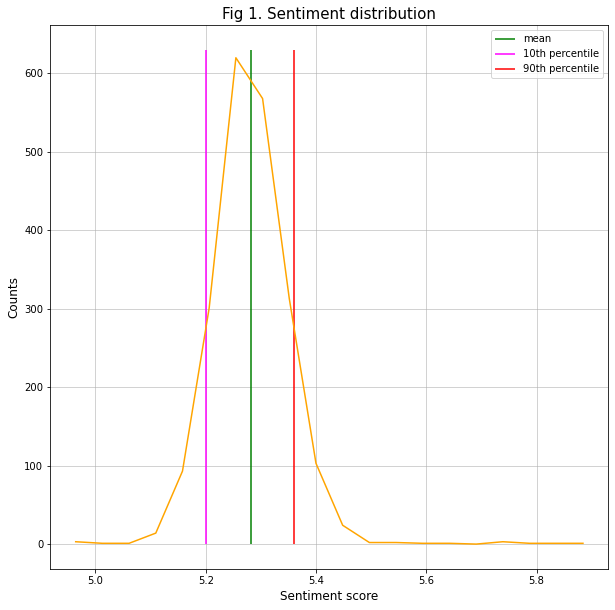

In [21]:
height, bins = np.histogram(sentiment, bins=20)

binmids = []
for i in range(len(bins)-1):
    binmids.append((bins[i]+bins[i+1])/2)
    
fig, ax = plt.subplots(1 ,figsize=(10,10))
    
plt.title('Fig 1. Sentiment distribution', size=15)
plt.xlabel('Sentiment score', size=12)
plt.ylabel('Counts', size=12)
plt.plot(binmids, height, color='orange')
plt.grid(alpha=0.7)
plt.vlines(mean, 0, max(height)+10, color='green', label='mean')
plt.vlines(p10, 0, max(height)+10, color='magenta', label='10th percentile')
plt.vlines(p90, 0, max(height)+10, color='red', label='90th percentile')
plt.legend()
plt.rc('axes', axisbelow=True)

The distribution resembles a Gaussian distribution with mean in 5.281. The 10th and 90th percentile is 5.201 and 5.351 respectively. The 10th and 90th percentile are 5.201 and 5.361 respectively and seems to be equally spaced from the mean.


Now grab the good/bad character names ([from this file](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/b1668fe5fbea0765ed6f9cf896bfaf208a13765b/files/wiki_meta_data.csv), see Week 8 for details) and calculate the same stats for only good/bad characters; also plot the histograms for the good/bad group and indicate the values of the mean, etc.

In [22]:
# load good/bad character file as pandas dataframe
df_meta = pd.read_csv("wiki_meta_data.csv")
df_meta =  df_meta.drop("Unnamed: 0", axis=1)
df_meta['WikiLink'] = df_meta['WikiLink'].str.replace(" ", "_").str.replace("ñ", "n")
df_meta

CharacterName                                           WikiLink  \
0       Abomination                            Abomination_(character)   
1     Absorbing Man                                      Absorbing_Man   
2            Achebe                                    Achebe_(comics)   
3             Agent                                     Agent_(comics)   
4           Agent X                            Agent_X_(Marvel_Comics)   
...             ...                                                ...   
2298            Xov                            Xov_(Action_Comics_242)   
2299             XS                                        XS_(comics)   
2300            4-D  International_Ultramarine_Corps#Founding_membe...   
2301         500Z-Q                          Hero_Hotline#Support_crew   
2302           #711                               711_(Quality_Comics)   

     universe  woman  man  good  bad  
0      Marvel      0    1     0    1  
1      Marvel      0    1     0    1  
2      Marvel      0    0     0    0  
3      Marvel      0    1     1    0  
4      Marvel      0    1     1    0  
...       ...    ...  ...   ...  ...  
2298       DC      0    0     0    0  
2299       DC      0    0     0    0  
2300       DC      0    0     0    0  
2301       DC      0    0     0    0  
2302       DC      0    0     0    0  

[2303 rows x 7 columns]

In [23]:
good = []
bad = []

for link in df_meta['WikiLink']:
    # split by the character if it's in the link
    if "|" in link:
        link = link.split("|")[0]
        
    if link in G.nodes():
        # check if link is a good or bad character. Append to the respective list
        if link in list(df_meta.loc[df_meta['good'] == 1]['WikiLink']):
            good.append(G.nodes[link]['sentiment'])
        elif link in list(df_meta.loc[df_meta['bad'] == 1]['WikiLink']):
            bad.append(G.nodes[link]['sentiment'])
            
print("Number of good characters:", len(good))
print("Number of bad characters:", len(bad))

Number of good characters: 389
Number of bad characters: 392


## Good characters

We now compute the mean, median, 10th percentile, and 90th percentile for the good characters and plot the distribution of sentiment values.

In [24]:
# calculate mean, median, 10th percentile, 90th percentile for good characters
good = [g for g in good if g != 0] # remove 0s
mean = np.mean(good)
median = np.median(good)
p10 = np.percentile(good, q=10)
p90 = np.percentile(good, q=90)

print("Statistics for good characters")
print("Mean:", round(mean,3))
print("Median", round(median,3))
print("10th percentile", round(p10,3))
print("90th percentile", round(p90,3))

Statistics for good characters
Mean: 5.306
Median 5.303
10th percentile 5.241
90th percentile 5.37


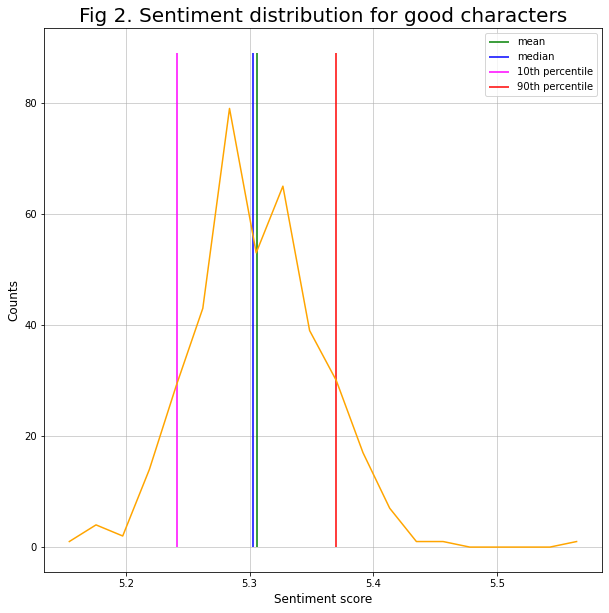

In [25]:
height, bins = np.histogram(good, bins=20)

binmids = []
for i in range(len(bins)-1):
    binmids.append((bins[i]+bins[i+1])/2)
    
    
fig, ax = plt.subplots(1 ,figsize=(10,10))

plt.title('Fig 2. Sentiment distribution for good characters', size=20)
plt.xlabel('Sentiment score', size=12)
plt.ylabel('Counts', size=12)
plt.plot(binmids, height, color='orange')
plt.grid(alpha=0.7)
plt.rc('axes', axisbelow=True)
plt.vlines(mean, 0, max(height)+10, color='green', label='mean')
plt.vlines(median, 0, max(height)+10, color='blue', label='median')
plt.vlines(p10, 0, max(height)+10, color='magenta', label='10th percentile')
plt.vlines(p90, 0, max(height)+10, color='red', label='90th percentile')
plt.legend();


The plot above shows the distribution of sentiment values for all the good characters. The mean is 5.306 which is slightly higher than the mean of the sentiment distribution for all characters. The median value is 5.303 and is slightly lower than the mean. The 10th and 90th percentile is 5.241 and 5.370 respectively and is also placed equally spaced from the mean. 

## Bad characters

We also compute the mean, median, 10th percentile, and 90th percentile for the bad characters and plot the distribution of sentiment values.

In [26]:
# calculate mean, median, 10th percentile, 90th percentile for bad characters
bad = [b for b in bad if b != 0] # remove 0s
mean = np.mean(bad)
median = np.median(bad)
p10 = np.percentile(bad, q=10)
p90 = np.percentile(bad, q=90)

print("Statistics for bad characters")
print("Mean:", round(mean,3))
print("Median", round(median,3))
print("10th percentile", round(p10,3))
print("90th percentile", round(p90,3))

Statistics for bad characters
Mean: 5.255
Median 5.255
10th percentile 5.187
90th percentile 5.321


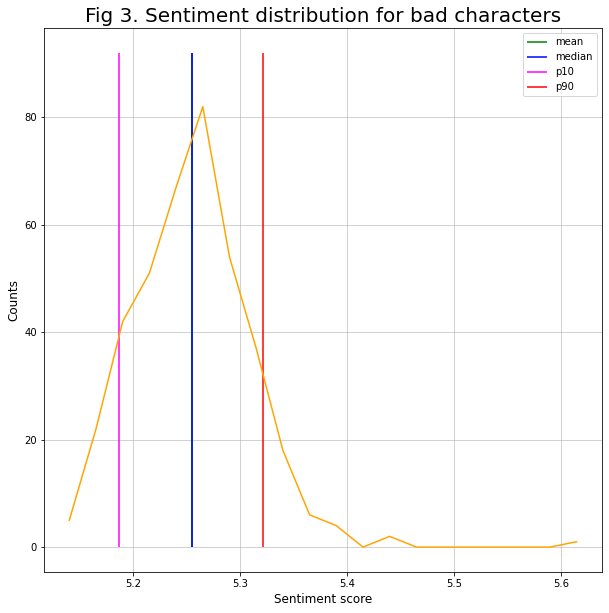

In [27]:
height, bins = np.histogram(bad, bins=20)

binmids = []
for i in range(len(bins)-1):
    binmids.append((bins[i]+bins[i+1])/2)
    
    
fig, ax = plt.subplots(1 ,figsize=(10,10))

plt.title('Fig 3. Sentiment distribution for bad characters', size=20)
plt.xlabel('Sentiment score', size=12)
plt.ylabel('Counts', size=12)
plt.plot(binmids, height, color='orange')
plt.grid(alpha=0.7)
plt.rc('axes', axisbelow=True)
plt.vlines(mean, 0, max(height)+10, color='green', label='mean')
plt.vlines(median, 0, max(height)+10, color='blue', label='median')
plt.vlines(p10, 0, max(height)+10, color='magenta', label='p10')
plt.vlines(p90, 0, max(height)+10, color='red', label='p90')
plt.legend();
# plt.xlim(min_, max_+1);

The plot above shows the distribution of sentiment values for all the bad characters. The mean is 5.255 which is slightly lower than the mean of the sentiment distribution for all characters. Furthermore, the median value is the same as the mean, 5.255. The 10th and 90th percentile are 5.187 and 5.321 and seems to be equidistant from the mean.

Finally use the label permutation test (see Week 5) to investigate the two hypotheses below
* H1: Good characters have a higher average value for sentiment than a similarly sized set of randomly selected characters.
* H2: Bad characters have a lower average value for sentiment than a similarly sized set of randomly selected characters.

Write a short paragraph reflecting on your findings.

We need the following two functions below to investigate the two hypotheses: ``get_good_and_bad_graph`` and ``get_permuted_sentiments``. The function ``get_good_and_bad_graph`` partitions the network into two subnetworks containing only the good and bad characters respectively. The function ``get_permuted_sentiments`` returns 1000 permutations of the average sentiment of M randomly selected characters.

In [28]:
def get_good_and_bad_graph(G):

    good_subgraph = [n for n in G.nodes() if n in list(df_meta.loc[df_meta['good'] == 1]['WikiLink']) and G.nodes()[n]['sentiment'] != 0]
    Good = G.subgraph(good_subgraph)

    bad_subgraph = [n for n in G.nodes() if n in list(df_meta.loc[df_meta['bad'] == 1]['WikiLink']) and G.nodes()[n]['sentiment'] != 0]    
    Bad = G.subgraph(bad_subgraph)

    return Good, Bad

In [29]:
def get_permuted_sentiments(graph):
    # get number of nodes of graph
    M = len(graph.nodes())
    print("Number of characters:", M)
    
    permuted_sentiments = []
    # permute 1000 times
    for i in tqdm(range(1000)):
        # randomly choose M nodes from graph G
        permute = random.sample(list(G.nodes()), M)
#         print(permute)
        
        # get sentiment and append
        sentiment = np.mean([G.nodes()[node]['sentiment'] for node in permute if G.nodes()[node]['sentiment'] != 0])
        permuted_sentiments.append(sentiment)
    
    return permuted_sentiments

In [30]:
# get Good and Bad partition
Good, Bad = get_good_and_bad_graph(G)

# get sentiments of good and bad characters respectively
avg_sentiment_G = [G.nodes[node]['sentiment'] for node in Good.nodes()]
avg_sentiment_B = [G.nodes[node]['sentiment'] for node in Bad.nodes()]

In [31]:
# mean sentiment values
print("Mean sentiment value for good characters:", round(np.mean(avg_sentiment_G),3))
print("Mean sentiment value for bad characters:", round(np.mean(avg_sentiment_B),3))

Mean sentiment value for good characters: 5.306
Mean sentiment value for bad characters: 5.255


Number of characters: 383



The mean of the distribution is: 5.281


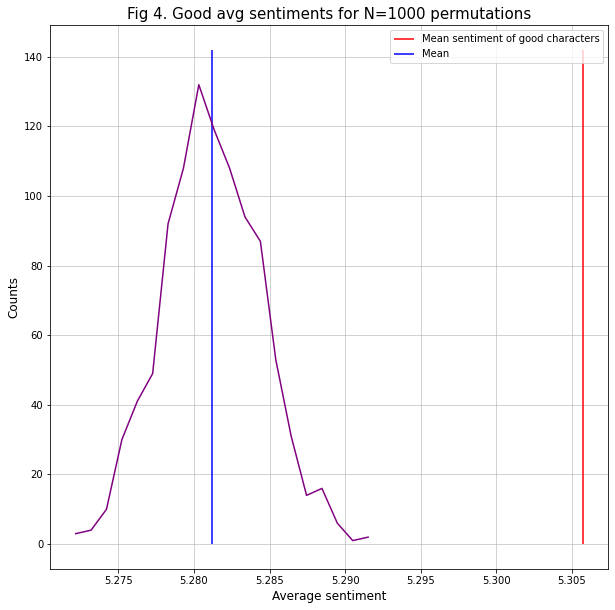

In [32]:
# Good
sentiment_Gs = get_permuted_sentiments(Good)

print("The mean of the distribution is:", round(np.mean(sentiment_Gs),3))

minX, maxX  = min(sentiment_Gs), max(sentiment_Gs)

height, bins = np.histogram(sentiment_Gs, bins=20)

binmids = []
for i in range(len(bins)-1):
    binmids.append((bins[i]+bins[i+1])/2)

fig, ax = plt.subplots(1 ,figsize=(10,10))    
    
plt.title('Fig 4. Good avg sentiments for N=1000 permutations', size=15)
plt.xlabel('Average sentiment', size=12)
plt.ylabel('Counts', size=12)
plt.plot(binmids, height, color='purple')
plt.grid(alpha=0.7)
plt.vlines(np.mean(avg_sentiment_G), 0, max(height)+10, color='red', label='Mean sentiment of good characters')
plt.vlines(np.mean(sentiment_Gs), 0, max(height)+10, color='blue', label='Mean')
plt.legend()
plt.rc('axes', axisbelow=True)

The figure shows the probability histogram for average sentiment values for $N=1000$ permutations. In each permutation, the mean sentiment value is computing using $383$ randomly selected characters. The histogram suggests the distribution of sentiment values is approximately Gaussian with mean around 5.185, which is the same mean value as the sentiment distribution for all characters.  

Number of characters: 391



The mean of the distribution is: 5.281


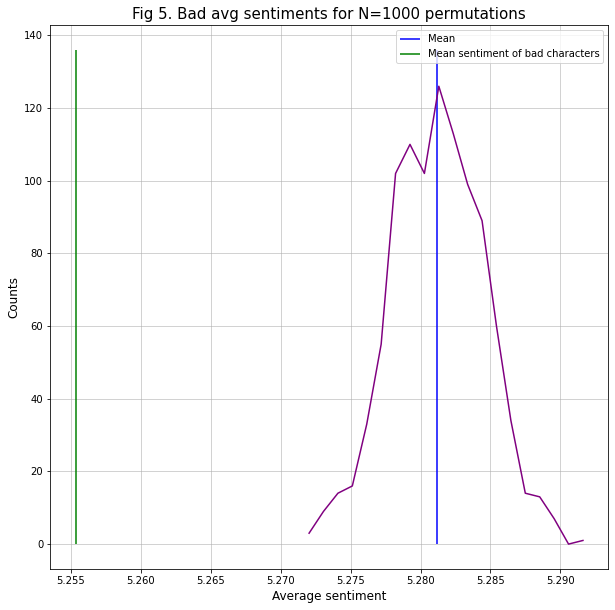

In [33]:
# Bad
sentiment_Bs = get_permuted_sentiments(Bad)

print("The mean of the distribution is:", round(np.mean(sentiment_Bs),3))

minX, maxX  = min(sentiment_Bs), max(sentiment_Bs)

height, bins = np.histogram(sentiment_Bs, bins=20)

binmids = []
for i in range(len(bins)-1):
    binmids.append((bins[i]+bins[i+1])/2)

fig, ax = plt.subplots(1 ,figsize=(10,10))    
    
plt.title('Fig 5. Bad avg sentiments for N=1000 permutations', size=15)
plt.xlabel('Average sentiment', size=12)
plt.ylabel('Counts', size=12)
plt.plot(binmids, height, color='purple')
plt.grid(alpha=0.7)
plt.vlines(np.mean(sentiment_Bs), 0, max(height)+10, color='blue', label="Mean")
plt.vlines(np.mean(avg_sentiment_B), 0, max(height+10), color='green', label="Mean sentiment of bad characters")
plt.legend()
plt.rc('axes', axisbelow=True)

The figure shows the probability histogram for average sentiment values for $N=1000$ permutations. In each permutation, the mean sentiment value is computing using $391$ randomly selected characters. The histogram suggests the distribution of sentiment values is approximately Gaussian with mean around 5.281, which is again the same mean value as the sentiment distribution for all characters. 

On figure 1, 2, and 3 we have plotted the distribution for all characters, the good characters and the bad characters respectively and have indicated the mean, 10th percentile and 90th percentile on the plots. The mean of sentiment distribution is 5.281. Curiously, the mean of the sentiment distribution of the good characters is slightly higher (5.306), and the mean of the sentiment distribution of the bad characters is slightly lower (5.255). 

To investigate the following two hypotheses:
* H1: Good characters have a higher average value for sentiment than a similarly sized set of randomly selected characters.
* H2: Bad characters have a lower average value for sentiment than a similarly sized set of randomly selected characters.

We performed two permutation tests with $N=1000$ permutations. The two permutation plots on figure 4 and 5 can be interpreted as a distribution of the average sentiment of M characters, M=383 and M=391 for good and bad respectively. The mean sentiment for the good characters is 5.306 and is located on the right tail of the distribution on figure 4, indicating that obtaining such value at random is highly improbable. Therefore, we can accept the hypothesis H1.

Furthermore, the mean sentiment for the bad characters is 5.255 and is located on the left tail for the distribution on figre 5, indicating that obtaining such value at random is also highly improbable. Therefore, we can also accept the hypothesis H2. 